# Loading

In [62]:
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [63]:
# getting useful columns
columns_to_import = ['review_id', 'product_category', 'star_rating','verified_purchase', 'review_headline', 'review_body', 'review_date']

electronics = pd.read_csv('data/amazon_reviews_electronics.tsv', sep='\t', usecols=columns_to_import)
electronics.head()

,review_id,product_category,star_rating,verified_purchase,review_headline,review_body,review_date
0,R2MTG1GCZLR2DK,Electronics,5,Y,Five Stars,As described.,2015-08-31
1,R2HBOEM8LE9928,Electronics,5,Y,It works as advertising.,It works as advertising.,2015-08-31
2,R1P4RW1R9FDPEE,Electronics,5,Y,Five Stars,Works pissa,2015-08-31
3,R1EBPM82ENI67M,Electronics,1,Y,One Star,Did not work at all.,2015-08-31
4,R372S58V6D11AT,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [64]:
electronics

,review_id,product_category,star_rating,verified_purchase,review_headline,review_body,review_date
0,R2MTG1GCZLR2DK,Electronics,5,Y,Five Stars,As described.,2015-08-31
1,R2HBOEM8LE9928,Electronics,5,Y,It works as advertising.,It works as advertising.,2015-08-31
2,R1P4RW1R9FDPEE,Electronics,5,Y,Five Stars,Works pissa,2015-08-31
3,R1EBPM82ENI67M,Electronics,1,Y,One Star,Did not work at all.,2015-08-31
4,R372S58V6D11AT,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31
...,...,...,...,...,...,...,...
3091098,RZ3LLAKIZQ3RR,Electronics,5,N,Next Millenium Consumer Electronics,"Diamond's RIO is the current, silicon-state ni...",1999-06-14
3091099,R1V8GVI67B7V0K,Electronics,5,N,WOW! THE BEST THING TO HAPPEN TO MUSIC!,The RIO rocks! It is so great that Diamond Mul...,1999-06-13
3091100,R3BDESK5VUNK8C,Electronics,5,N,The most powerful boombox ever made.,I have listened to practically every boombox a...,1999-06-12
3091101,R1JJGM0JWVT7DV,Electronics,5,N,very nice,compared to my old discman this one is really ...,1999-06-12


# Descriptions

In [65]:
# data types
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091103 entries, 0 to 3091102
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   review_id          object
 1   product_category   object
 2   star_rating        int64 
 3   verified_purchase  object
 4   review_headline    object
 5   review_body        object
 6   review_date        object
dtypes: int64(1), object(6)
memory usage: 165.1+ MB


In [66]:
# data shape
electronics.shape

(3091103, 7)

In [67]:
star_count  = electronics['star_rating'].value_counts()
star_count

star_rating
5    1779426
4     536423
1     357827
3     238393
2     179034
Name: count, dtype: int64

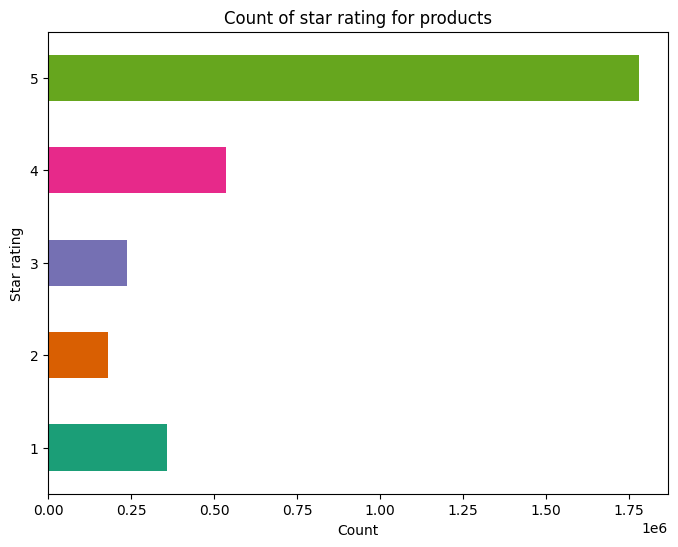

In [68]:
star_count = pd.Series(star_count)
star_count = star_count.sort_index()

plt.figure(figsize=(8, 6))
star_count.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Count of star rating for products')
plt.xlabel('Count')
plt.ylabel('Star rating')
plt.show()

**Grouping:**  
1-2 stars group  
3 stars group  
4-5 stars group  

# Cleaning

In [69]:
electronics2 = electronics.copy()

In [70]:
# check for na values
electronics2.isna().sum()

review_id              0
product_category       0
star_rating            0
verified_purchase      0
review_headline       39
review_body          147
review_date           24
dtype: int64

In [71]:
# check for duplicate rows
electronics2.duplicated().sum()
# no duplicates

np.int64(0)

In [72]:
# keeping only verified purchases
electronics2 = electronics2[electronics2['verified_purchase'] == 'Y']
electronics2

,review_id,product_category,star_rating,verified_purchase,review_headline,review_body,review_date
0,R2MTG1GCZLR2DK,Electronics,5,Y,Five Stars,As described.,2015-08-31
1,R2HBOEM8LE9928,Electronics,5,Y,It works as advertising.,It works as advertising.,2015-08-31
2,R1P4RW1R9FDPEE,Electronics,5,Y,Five Stars,Works pissa,2015-08-31
3,R1EBPM82ENI67M,Electronics,1,Y,One Star,Did not work at all.,2015-08-31
4,R372S58V6D11AT,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31
...,...,...,...,...,...,...,...
3091002,R2AN3ZV5E3ALB5,Electronics,1,Y,Really bad reception,Constant static with nearly all radio stations...,1999-07-30
3091007,R1J16TEDOYCZTN,Electronics,4,Y,Overall a good combo of features for price...,I'm looking into systems to replace a stereo t...,1999-07-27
3091008,R3IYPH06PH1HRA,Electronics,5,Y,After looking at all others,I chose to purchase this Sharp. The Aiwa unit ...,1999-07-26
3091010,RGHZIK8D6X7QR,Electronics,5,Y,My Wifes Favorite Toy,This device is a G*d send.We had 8 different r...,1999-07-26


In [73]:
# keeping rows that are from 2015 for more recent sentiments
electronics2['review_date'] = pd.to_datetime(electronics2['review_date'], errors='coerce')

electronics2 = electronics2[electronics2['review_date'].dt.year == 2015]
electronics2

,review_id,product_category,star_rating,verified_purchase,review_headline,review_body,review_date
0,R2MTG1GCZLR2DK,Electronics,5,Y,Five Stars,As described.,2015-08-31
1,R2HBOEM8LE9928,Electronics,5,Y,It works as advertising.,It works as advertising.,2015-08-31
2,R1P4RW1R9FDPEE,Electronics,5,Y,Five Stars,Works pissa,2015-08-31
3,R1EBPM82ENI67M,Electronics,1,Y,One Star,Did not work at all.,2015-08-31
4,R372S58V6D11AT,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31
...,...,...,...,...,...,...,...
809860,RIZWB7U15CIEF,Electronics,4,Y,Good replacement at a decent price.,Good replacement for earlier headset that died...,2015-01-01
809861,RYSDR1OVXJ3SW,Electronics,5,Y,Five Stars,Very happy with product and quick delivery.,2015-01-01
809862,R37U3YUM66XDDN,Electronics,4,Y,Four Stars,Cords are too thin for my comfort. Otherwise w...,2015-01-01
809863,R3UM7NLWS1R1K9,Electronics,5,Y,Great little adapter,This little adapter worked great in Grenada to...,2015-01-01


In [74]:
# seems like a lot of the review headlines have these headlines as default entries, will remove them as it does not provide additional information on sentiments
headline_defaults = ["One Star", "Two Stars", "Three Stars", "Four Stars", "Five Stars"]

for pattern in headline_defaults:
    electronics2['review_headline'] = electronics2['review_headline'].str.replace(pattern, '', regex=False)

electronics2

/var/folders/rx/mbqd2k4n7jdfrwxrzjqkq0lh0000gn/T/ipykernel_60640/422058656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics2['review_headline'] = electronics2['review_headline'].str.replace(pattern, '', regex=False)


,review_id,product_category,star_rating,verified_purchase,review_headline,review_body,review_date
0,R2MTG1GCZLR2DK,Electronics,5,Y,,As described.,2015-08-31
1,R2HBOEM8LE9928,Electronics,5,Y,It works as advertising.,It works as advertising.,2015-08-31
2,R1P4RW1R9FDPEE,Electronics,5,Y,,Works pissa,2015-08-31
3,R1EBPM82ENI67M,Electronics,1,Y,,Did not work at all.,2015-08-31
4,R372S58V6D11AT,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31
...,...,...,...,...,...,...,...
809860,RIZWB7U15CIEF,Electronics,4,Y,Good replacement at a decent price.,Good replacement for earlier headset that died...,2015-01-01
809861,RYSDR1OVXJ3SW,Electronics,5,Y,,Very happy with product and quick delivery.,2015-01-01
809862,R37U3YUM66XDDN,Electronics,4,Y,,Cords are too thin for my comfort. Otherwise w...,2015-01-01
809863,R3UM7NLWS1R1K9,Electronics,5,Y,Great little adapter,This little adapter worked great in Grenada to...,2015-01-01


In [75]:
# combining headline and body review together
electronics2['combined_review'] = electronics2['review_headline'] + " " + electronics2['review_body']
electronics2 = electronics2.drop(columns=['review_headline', 'review_body'])
electronics2 = electronics2.dropna(subset=['combined_review'])

electronics2

/var/folders/rx/mbqd2k4n7jdfrwxrzjqkq0lh0000gn/T/ipykernel_60640/2607883347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics2['combined_review'] = electronics2['review_headline'] + " " + electronics2['review_body']


,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
0,R2MTG1GCZLR2DK,Electronics,5,Y,2015-08-31,As described.
1,R2HBOEM8LE9928,Electronics,5,Y,2015-08-31,It works as advertising. It works as advertising.
2,R1P4RW1R9FDPEE,Electronics,5,Y,2015-08-31,Works pissa
3,R1EBPM82ENI67M,Electronics,1,Y,2015-08-31,Did not work at all.
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,Overall pleased with the item Works well. Bass...
...,...,...,...,...,...,...
809860,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,Good replacement at a decent price. Good repla...
809861,RYSDR1OVXJ3SW,Electronics,5,Y,2015-01-01,Very happy with product and quick delivery.
809862,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,Cords are too thin for my comfort. Otherwise ...
809863,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,Great little adapter This little adapter worke...


# Preprocessing

In [76]:
electronics3 = electronics2.copy()

In [77]:
# change all letters to lowercase, remove special characters
electronics3.loc[:, 'combined_review'] = electronics3['combined_review'] \
    .str.lower() \
    .str.replace(r'[>*()^%$!\-+=\{\}\[\]<>:._\',]', ' ', regex=True)

electronics3

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
0,R2MTG1GCZLR2DK,Electronics,5,Y,2015-08-31,as described
1,R2HBOEM8LE9928,Electronics,5,Y,2015-08-31,it works as advertising it works as advertising
2,R1P4RW1R9FDPEE,Electronics,5,Y,2015-08-31,works pissa
3,R1EBPM82ENI67M,Electronics,1,Y,2015-08-31,did not work at all
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,overall pleased with the item works well bass...
...,...,...,...,...,...,...
809860,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,good replacement at a decent price good repla...
809861,RYSDR1OVXJ3SW,Electronics,5,Y,2015-01-01,very happy with product and quick delivery
809862,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,cords are too thin for my comfort otherwise ...
809863,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,great little adapter this little adapter worke...


In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raisie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
# set of stopwords
stop_words = set(stopwords.words('english'))

# remove url
electronics3['combined_review'] = electronics3['combined_review'].apply(lambda x: re.sub(r"http?://\S+|www\.\S+", "", x))

# remove #hashtags
electronics3['combined_review'] = electronics3['combined_review'].str.replace(r'#([^\s]+)', '', regex=True)

# remove stopwords
electronics3['combined_review'] = electronics3['combined_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# remove numbers
electronics3['combined_review'] = electronics3['combined_review'].str.replace(r'\d+', '', regex=True)

# replace newline and returns with space
electronics3['combined_review'] = electronics3['combined_review'].str.replace(r'\n|\r', ' ', regex=True)

# change all letters to lowercase, remove special characters
electronics3['combined_review'] = electronics3['combined_review'].str.lower().str.replace(r'[_]', ' ', regex=True)

# remove more special characters
electronics3['combined_review'] = electronics3['combined_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# remove multiple spaces
electronics3['combined_review'] = electronics3['combined_review'].str.replace(r'\s+', ' ', regex=True)

# remove empty entries at the end
electronics3 = electronics3[electronics3['combined_review'].str.strip().astype(bool)]

print(electronics3[['combined_review']].head())

                                     combined_review
0                                          described
1                works advertising works advertising
2                                        works pissa
3                                               work
4  overall pleased item works well bass somewhat ...


In [80]:
# import nltk
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/raisie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/raisie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
electronics3.loc[:, 'combined_review'] = electronics3['combined_review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [82]:
electronics3

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
0,R2MTG1GCZLR2DK,Electronics,5,Y,2015-08-31,described
1,R2HBOEM8LE9928,Electronics,5,Y,2015-08-31,work advertising work advertising
2,R1P4RW1R9FDPEE,Electronics,5,Y,2015-08-31,work pissa
3,R1EBPM82ENI67M,Electronics,1,Y,2015-08-31,work
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,overall pleased item work well bass somewhat l...
...,...,...,...,...,...,...
809860,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,good replacement decent price good replacement...
809861,RYSDR1OVXJ3SW,Electronics,5,Y,2015-01-01,happy product quick delivery
809862,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,cord thin comfort otherwise worth price
809863,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,great little adapter little adapter worked gre...


In [83]:
# check for duplicates
electronics3.duplicated().sum()

np.int64(0)

In [84]:
electronics3 = pd.read_csv('data/electronics3.csv')
electronics3

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
0,R2MTG1GCZLR2DK,Electronics,5,Y,2015-08-31,described
1,R2HBOEM8LE9928,Electronics,5,Y,2015-08-31,work advertising work advertising
2,R1P4RW1R9FDPEE,Electronics,5,Y,2015-08-31,work pissa
3,R1EBPM82ENI67M,Electronics,1,Y,2015-08-31,work
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,overall pleased item work well bass somewhat l...
...,...,...,...,...,...,...
749823,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,good replacement decent price good replacement...
749824,RYSDR1OVXJ3SW,Electronics,5,Y,2015-01-01,happy product quick delivery
749825,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,cord thin comfort otherwise worth price
749826,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,great little adapter little adapter worked gre...


In [85]:
# getting review lengths
electronics3['review_length'] = electronics3['combined_review'].apply(lambda x: len(x.split()))

# filter off short and long reviews
electronics3 = electronics3[(electronics3['review_length'] >= 5) & (electronics3['review_length'] <= 100)]
electronics3 = electronics3.drop(columns =['review_length'])

electronics3

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,overall pleased item work well bass somewhat l...
5,R1A4514XOYI1PD,Electronics,5,Y,2015-08-31,quality speaker insanely good sound muddy adju...
6,R20D9EHB7N20V6,Electronics,5,Y,2015-08-31,lifesaver wish could give product five star li...
8,R1QCYLT25812DM,Electronics,4,Y,2015-08-31,great sound compact battery life seems good ha...
11,RLQT3V8SMNIBH,Electronics,5,Y,2015-08-31,love clock radio cd player easy operate
...,...,...,...,...,...,...
749822,R2X0Q45TT4VFJU,Electronics,1,Y,2015-01-01,awful iphone sound better louder iphone sound ...
749823,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,good replacement decent price good replacement...
749825,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,cord thin comfort otherwise worth price
749826,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,great little adapter little adapter worked gre...


# Trends

## General

In [86]:
electronics4 = electronics3.copy()

In [87]:
electronics4

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,overall pleased item work well bass somewhat l...
5,R1A4514XOYI1PD,Electronics,5,Y,2015-08-31,quality speaker insanely good sound muddy adju...
6,R20D9EHB7N20V6,Electronics,5,Y,2015-08-31,lifesaver wish could give product five star li...
8,R1QCYLT25812DM,Electronics,4,Y,2015-08-31,great sound compact battery life seems good ha...
11,RLQT3V8SMNIBH,Electronics,5,Y,2015-08-31,love clock radio cd player easy operate
...,...,...,...,...,...,...
749822,R2X0Q45TT4VFJU,Electronics,1,Y,2015-01-01,awful iphone sound better louder iphone sound ...
749823,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,good replacement decent price good replacement...
749825,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,cord thin comfort otherwise worth price
749826,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,great little adapter little adapter worked gre...


In [88]:
# check for null values in combined_review
print(electronics4['combined_review'].isna().sum())


0


In [89]:
# # remove null row from combined_review
# electronics4 = electronics4.dropna(subset=['combined_review'])

# print(electronics4['combined_review'].isna().sum())


In [90]:
electronics4

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
4,R372S58V6D11AT,Electronics,5,Y,2015-08-31,overall pleased item work well bass somewhat l...
5,R1A4514XOYI1PD,Electronics,5,Y,2015-08-31,quality speaker insanely good sound muddy adju...
6,R20D9EHB7N20V6,Electronics,5,Y,2015-08-31,lifesaver wish could give product five star li...
8,R1QCYLT25812DM,Electronics,4,Y,2015-08-31,great sound compact battery life seems good ha...
11,RLQT3V8SMNIBH,Electronics,5,Y,2015-08-31,love clock radio cd player easy operate
...,...,...,...,...,...,...
749822,R2X0Q45TT4VFJU,Electronics,1,Y,2015-01-01,awful iphone sound better louder iphone sound ...
749823,RIZWB7U15CIEF,Electronics,4,Y,2015-01-01,good replacement decent price good replacement...
749825,R37U3YUM66XDDN,Electronics,4,Y,2015-01-01,cord thin comfort otherwise worth price
749826,R3UM7NLWS1R1K9,Electronics,5,Y,2015-01-01,great little adapter little adapter worked gre...


## Explanation and Justification

Split by:  
1-2 Stars: Expecting negative sentiments with complaints and areas of improvement. Will assume all words have a negative connotation to it.  
3 Stars: Expecting neutral sentiments with both complaints and compliments  
4-5 Stars: Expecting positive sentiments with mainly compliments. Will assume all words have a positive connotation to it.     

We will be selecting a random 20000 reviews from each group. Reducing the dataset to 20000 reviews per star rating allows for efficient processing while maintaining a representative sample of each rating group. This sample size is sufficient to capture key sentiment patterns within each category, ensuring the findings remain meaningful without the need to process an excessively large dataset.

In [91]:
sample_size = 20000

# stratified sampling for each rating group
low_ratings = electronics4[electronics4['star_rating'].isin([1, 2])].sample(n=sample_size, random_state=42)
mid_ratings = electronics4[electronics4['star_rating'] == 3].sample(n=sample_size, random_state=42)
high_ratings = electronics4[electronics4['star_rating'].isin([4, 5])].sample(n=sample_size, random_state=42)

## 4-5 Star Ratings

In [92]:
high_ratings

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
600785,R3AGFMVC9RMIXI,Electronics,5,Y,2015-02-12,great value good sound great product price fit...
281614,R1CF336SEOXVAJ,Electronics,5,Y,2015-05-27,got run interference crappy local power plasma...
405575,R1KG9GW8LPO7CQ,Electronics,4,Y,2015-04-11,good price le cost att like black
459139,R3CWNHDAJH6OLA,Electronics,5,Y,2015-03-24,work great take little figuring purchased sale...
543364,RWCUERARM1ZS5,Electronics,5,Y,2015-02-27,would pay more perfect operation
...,...,...,...,...,...,...
410176,R1UYANYW5DAQEW,Electronics,5,Y,2015-04-10,bargain using sony vplhwes projector work like...
69042,R22PY4WZIMBJZ0,Electronics,5,Y,2015-08-09,cheap alternative buying new tv hd tv came one...
12848,RKSCKVPIKGEF5,Electronics,5,Y,2015-08-27,fantastic sound hiss static plyable cord stiff...
742705,R35G5W3K8RA7YK,Electronics,5,Y,2015-01-02,great sound unbeatable price value key word gr...


In [93]:
# getting count of each word in accumulation of all the reviews
def count_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

word_counts = high_ratings['combined_review'].apply(count_words).sum()

high_word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = high_word_counts_df.sort_values(by ='count', ascending =False)
print(high_word_counts_df)

             word  count
0           great  12560
1           value    703
2            good   6858
3           sound   6786
4         product   3727
...           ...    ...
14488  kardashian      1
14489    diligent      1
14490     vplhwes      1
14491     plyable      1
14492     anthony      1

[14493 rows x 2 columns]


In [94]:
# removing words with count less than 500
high_words_count_df_500 = high_word_counts_df.query('count > 500')
len(high_words_count_df_500)

148

In [95]:
high_words_count_df_500 = high_words_count_df_500.sort_values(by='count', ascending=False)
high_words_count_df_500

,word,count
0,great,12560
43,work,7483
2,good,6858
3,sound,6786
5,price,4051
...,...,...
50,amazon,513
107,sure,513
244,beat,510
209,advertised,509


In [96]:
high_words_count_df_500

,word,count
0,great,12560
43,work,7483
2,good,6858
3,sound,6786
5,price,4051
...,...,...
50,amazon,513
107,sure,513
244,beat,510
209,advertised,509


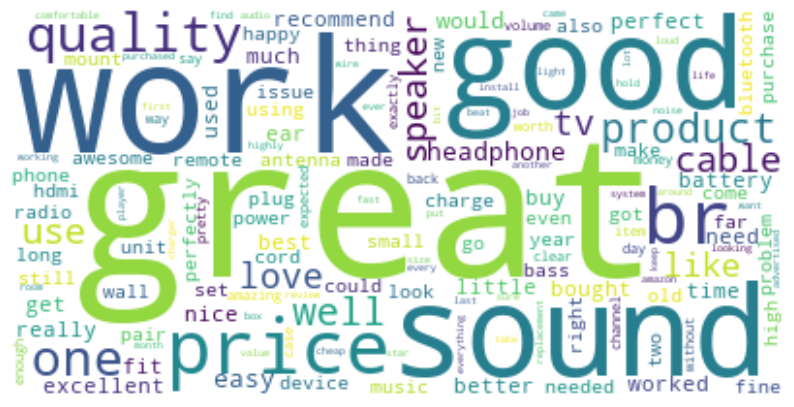

In [97]:
# merging all reviews into a singular text string
word_dict = dict(zip(high_words_count_df_500['word'], high_words_count_df_500['count']))

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
# getting top 10 words and their counts
high_words_count_df_top10 = high_words_count_df_500.head(10)
len(high_words_count_df_top10)

10

In [99]:
high_words_count_df_top10

,word,count
0,great,12560
43,work,7483
2,good,6858
3,sound,6786
5,price,4051
153,br,4014
81,quality,3946
36,one,3741
4,product,3727
7,well,3481


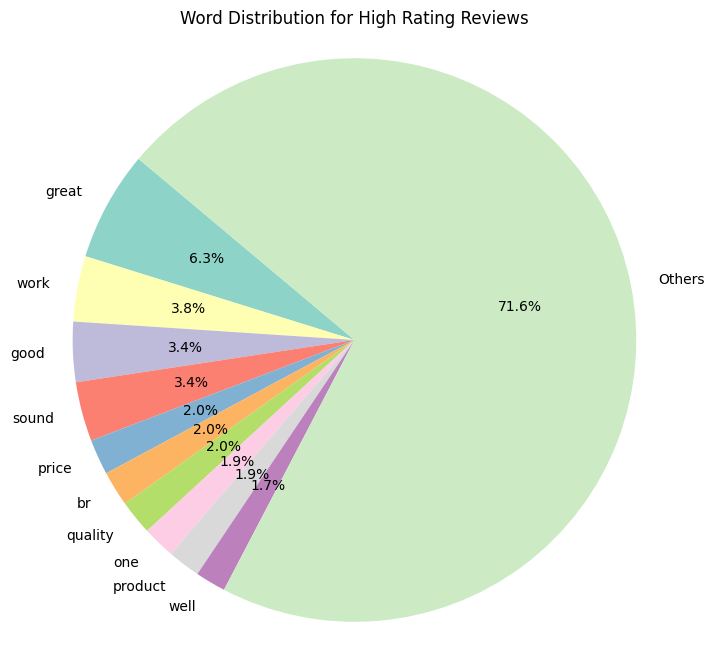

In [100]:
# plotting the pie chart
sum_others = high_words_count_df_500.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([high_words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution for High Rating Reviews')
plt.axis('equal')
plt.show()

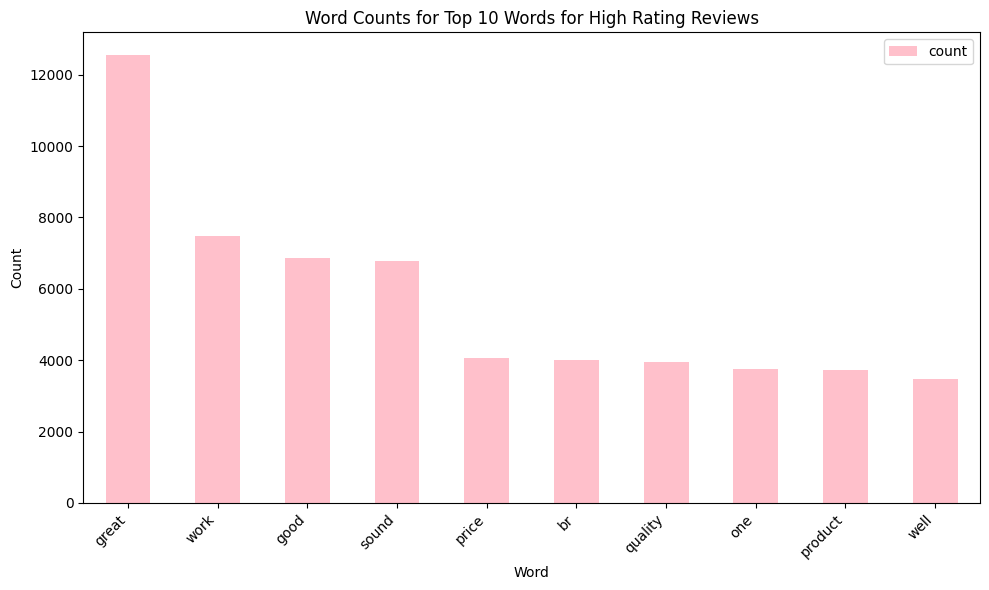

In [101]:
# plotting a bar chart to see count of top 10 words
high_words_count_df_top10.plot(kind='bar', x='word', y='count', color='pink', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words for High Rating Reviews')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

**Sentiment Analysis for positive rated reviews**  
From the findings, it can be inferred that with positive ratings come positive sentiments on the products. These words have high word count and we can assume that:  

"sound" - customers find that the electronic (audio electronic) has good sound quality  
"price" - customers find that the electronic is well-priced and value for money  
"cable" and "battery" - though lower in the word count list, it can be likely be said that some customers find that the electronics to have good cables and good battery life  

## 3 Star Rating

In [102]:
mid_ratings

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
240670,R34AESTBMHDQRM,Electronics,3,Y,2015-06-10,thick plug sleeve mean fit recessed jack
307562,R1ZEHNF31V13W3,Electronics,3,Y,2015-05-17,work great iphone work great iphone ipad bluet...
483326,R1SOI3IC159W7,Electronics,3,Y,2015-03-16,multi national plug unit hold together well ad...
506235,R1IQW5D2XDX8VT,Electronics,3,Y,2015-03-09,weirdly enough weirdly enough battery tiny bit...
659872,R9W5JEPSW3BKP,Electronics,3,Y,2015-01-24,limited life expectancy worked great died coup...
...,...,...,...,...,...,...
748122,R32I39ZCW16MYJ,Electronics,3,Y,2015-01-01,get darn thing work looking tv
535546,R3L1QU64AIGSM1,Electronics,3,Y,2015-03-01,theyre ok earphone sound ok great bad ok stay ...
108839,R2UD61UM787JV3,Electronics,3,Y,2015-07-27,work need work need problem lot smaller though...
34312,R360M3YIHE57VL,Electronics,3,Y,2015-08-20,awesome lasted loved phone everything crisp pe...


In [103]:
# getting count of each word in accumulation of all the reviews
def count_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

word_counts = mid_ratings['combined_review'].apply(count_words).sum()

mid_word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
mid_word_counts_df = mid_word_counts_df.sort_values(by ='count', ascending =False)
print(mid_word_counts_df)

            word  count
7           work   8433
205         good   8182
106        sound   8071
84            br   6124
8          great   5196
...          ...    ...
9753    systemic      1
9751    googling      1
9750   noticibly      1
9747      axcess      1
15356    foxnovo      1

[15357 rows x 2 columns]


In [104]:
# removing words with count less than 500
mid_words_count_df_500 = mid_word_counts_df.query('count > 500')
len(mid_words_count_df_500)

201

In [105]:
mid_words_count_df_500

,word,count
7,work,8433
205,good,8182
106,sound,8071
84,br,6124
8,great,5196
...,...,...
158,maybe,523
353,usb,516
56,longer,507
741,getting,504


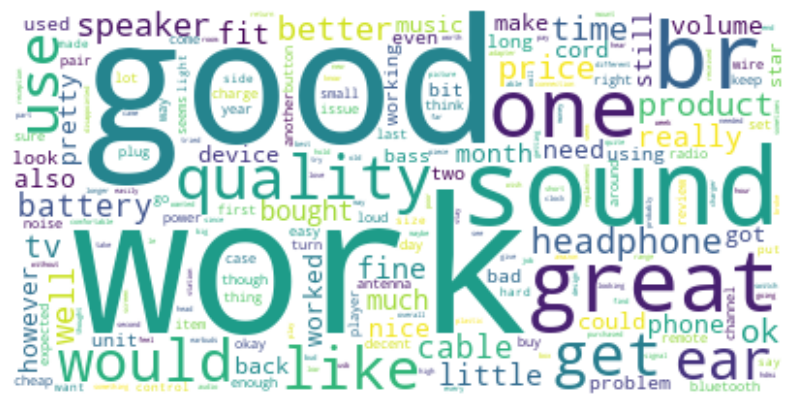

In [106]:
# merging all reviews into a singular text string
word_dict = dict(zip(mid_words_count_df_500['word'], mid_words_count_df_500['count']))

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [107]:
# getting top 10 words and their counts
mid_words_count_df_top10 = mid_words_count_df_500.head(10)
len(mid_words_count_df_top10)

10

In [108]:
mid_words_count_df_top10

,word,count
7,work,8433
205,good,8182
106,sound,8071
84,br,6124
8,great,5196
62,one,4978
107,quality,4127
97,get,3929
44,use,3710
123,like,3655


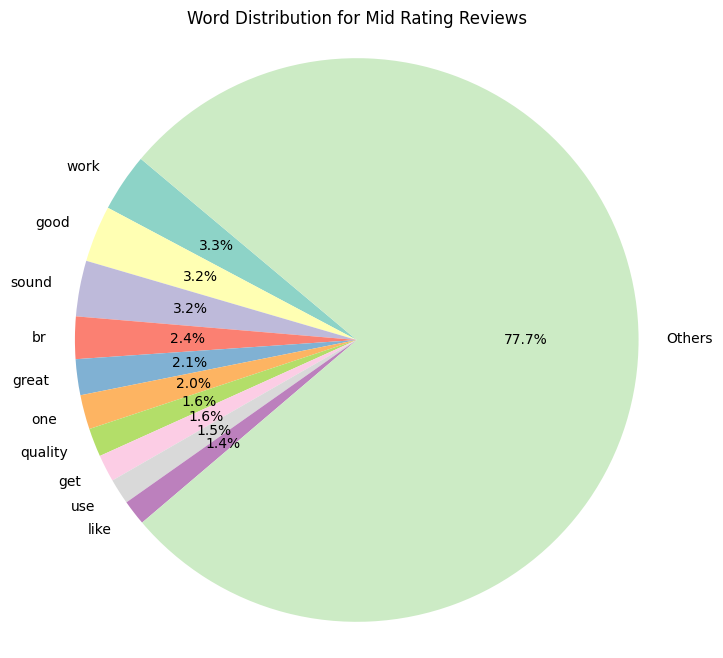

In [109]:
# plotting the pie chart
sum_others = mid_words_count_df_500.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([mid_words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution for Mid Rating Reviews')
plt.axis('equal')
plt.show()

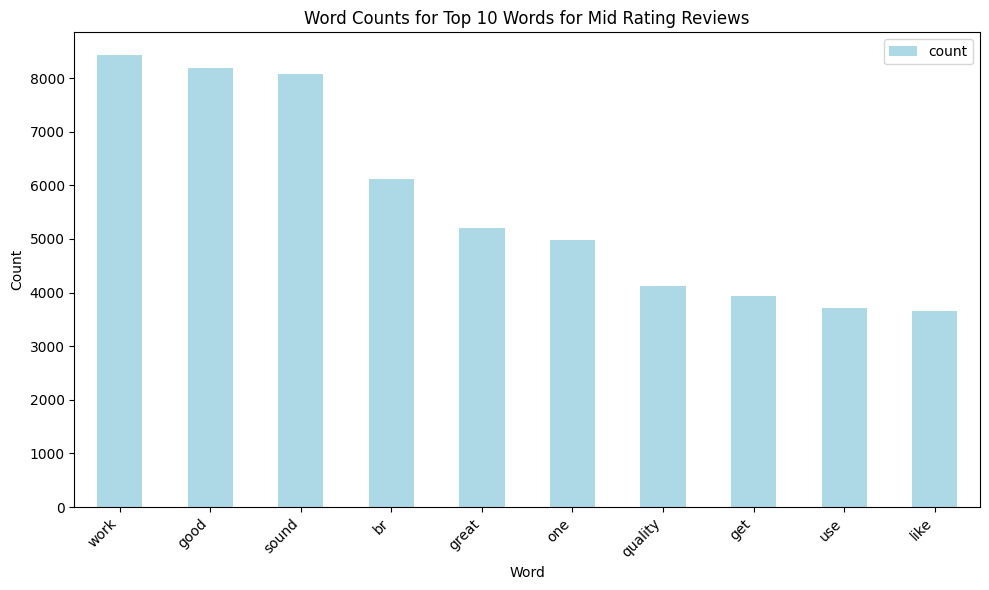

In [110]:
# plotting a bar chart to see count of top 10 words
mid_words_count_df_top10.plot(kind='bar', x='word', y='count', color='lightblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words for Mid Rating Reviews')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

**Sentiment Analysis for mid rated reviews**  
From the findings, it can be inferred that with mid ratings come neutral and both positive and negative sentiments on the products. These words have high word count and we can assume that:  

"sound" - customers find that the electronic (audio electronic) has good enough sound quality  
"work" - customers find that the electronic works as intended  
"quality" - customers find that the electronic is of good/bad quality
"time" - though lower in the word count list, it can be likely be said that some customers have opinions on the time taken for delivery

## 1-2 Star Reviews

In [111]:
low_ratings

,review_id,product_category,star_rating,verified_purchase,review_date,combined_review
100164,RQOX3HUQC6IV0,Electronics,1,Y,2015-07-30,post update better luck second pair used swim ...
4406,R2VBAL3VX4ZLZC,Electronics,2,Y,2015-08-30,would work speaker although description said w...
616302,RW8HXKZUSZ3EX,Electronics,1,Y,2015-02-07,horribly quality barely able get working buy
478455,R3SOQSL34XZEKV,Electronics,2,Y,2015-03-18,able get couple station signal strength good w...
287075,R1ALMC4QBOMWMF,Electronics,2,Y,2015-05-25,quality hopping splitter start fiber optic lin...
...,...,...,...,...,...,...
438179,R1U6ID1V3X0K11,Electronics,1,Y,2015-03-31,bought nd generation google nexus bought nd ge...
422191,R3SRMYB269M3WX,Electronics,2,Y,2015-04-06,battery low goodbye sound fine battery life pa...
404193,R1HZQUQEA6AY84,Electronics,1,Y,2015-04-12,great read many review people saying speaker l...
209133,R3IUI1A1OBSRJ,Electronics,1,Y,2015-06-22,bulb worked day stopped bulb worked day stoppe...


In [112]:
# getting count of each word in accumulation of all the reviews
def count_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

word_counts = low_ratings['combined_review'].apply(count_words).sum()

low_word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
low_word_counts_df = low_word_counts_df.sort_values(by ='count', ascending =False)
print(low_word_counts_df)

              word  count
17            work   7845
118            one   5720
119             br   5118
89           sound   5104
117        product   4169
...            ...    ...
5416         lends      1
10527     slapshed      1
5417   flexibility      1
10525   innovation      1
15212     lollipop      1

[15213 rows x 2 columns]


In [113]:
# removing words with count less than 500
low_words_count_df_500 = low_word_counts_df.query('count > 500')
len(low_words_count_df_500)

197

In [114]:
low_words_count_df_500

,word,count
17,work,7845
118,one,5720
119,br,5118
89,sound,5104
117,product,4169
...,...,...
36,station,509
531,looking,507
418,think,505
938,switch,505


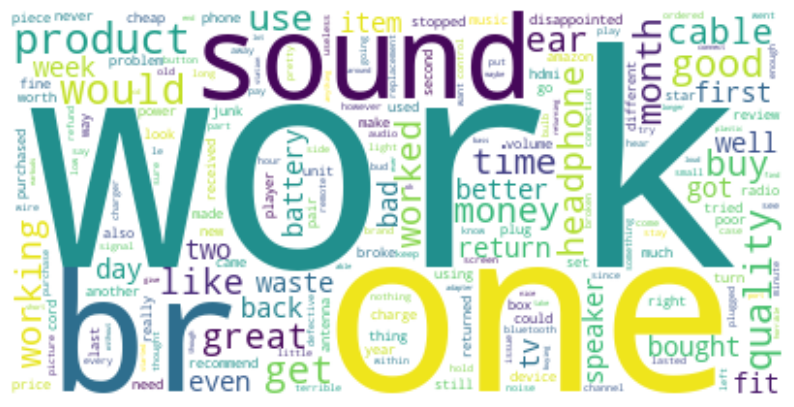

In [115]:
# merging all reviews into a singular text string
word_dict = dict(zip(low_words_count_df_500['word'], low_words_count_df_500['count']))

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [116]:
# getting top 10 words and their counts
low_words_count_df_top10 = low_words_count_df_500.head(10)
len(low_words_count_df_top10)

10

In [117]:
low_words_count_df_top10

,word,count
17,work,7845
118,one,5720
119,br,5118
89,sound,5104
117,product,4169
16,would,3962
32,get,3715
39,good,3558
29,quality,3518
22,time,3193


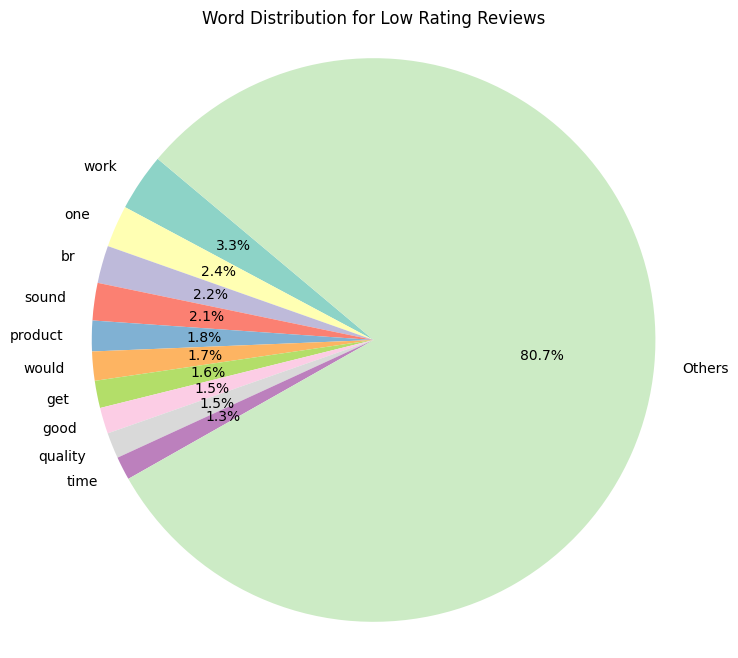

In [118]:
# plotting the pie chart
sum_others = low_words_count_df_500.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([low_words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution for Low Rating Reviews')
plt.axis('equal')
plt.show()

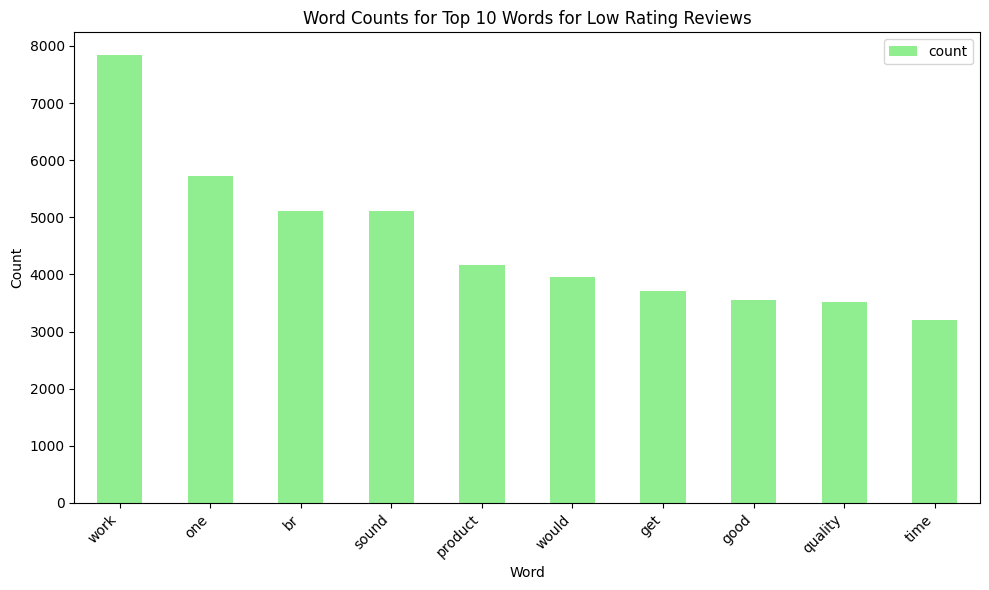

In [119]:
# plotting a bar chart to see count of top 10 words
low_words_count_df_top10.plot(kind='bar', x='word', y='count', color='lightgreen', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words for Low Rating Reviews')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

**Sentiment Analysis for low rated reviews**  
From the findings, it can be inferred that with low ratings come negative sentiments on the products. These words have high word count and we can assume that:  

"work" - customers find that the electronic does not work or works poorly
"sound" - customers find that the electronic (audio electronic) has poor sound quality  
"quality" - customers find that the electronic is of poor quality
"time", "use" and "month" - though lower in the word count list, it can be likely be said that some customers find that the delivery was very slow or that they had poor experience using the product  

# Conclusion

In conclusion, the sentiment analysis across different rating categories reveals distinct patterns in customer feedback that highlight both positive attributes and common issues with the electronics  

For high rating reviews, customers are generally satisfied with the product's sound quality, pricing, and overall value for money, indicating that these attributes meet or exceed expectations. Positive mentions of cable and battery life, though less frequent, suggest that these features also contribute to customer satisfaction.

For mid rating reviews, they offer a blend of positive and neutral feedback. Customers note that the electronics generally work as expected and have adequate sound quality. However, comments on quality and delivery time reflect mixed sentiments, indicating areas where customer expectations may be met inconsistently, leading to moderate satisfaction.

For low rating reviews, they emphasize issues with the electronics' functionality, sound quality, and overall quality. High-frequency mentions of terms like work and quality reveal dissatisfaction, with customers indicating that the products either do not work as expected or lack durability. Additionally, mentions of time, use, and month in this category suggest complaints regarding delivery delays or poor experience with the product over time.

Overall, this analysis highlights key areas for improvement, such as enhancing product durability, refining audio quality for consistency, and addressing delivery timelines. Addressing these issues could help reduce negative feedback and improve customer satisfaction across all rating categories.
